In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as st
from scipy.stats import linregress


In [2]:
# Read in csv
csv_path = Path("2023 Spotify Data (2).csv")

top_spotify = pd.read_csv(csv_path)
top_spotify

top_spotify_df = pd.DataFrame(top_spotify)
top_spotify_df

,week,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
0,2023.01,1,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,SZA,Kill Bill,Top Dawg Entertainment/RCA Records,1,2,4,15030938
1,2023.01,2,spotify:track:1bDbXMyjaUIooNwFE9wn0N,"Drake, 21 Savage",Rich Flex,OVO / Republic Records,1,13,9,8469115
2,2023.01,3,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,"Metro Boomin, The Weeknd, 21 Savage",Creepin' (with The Weeknd & 21 Savage),Republic Records,1,12,5,8039812
3,2023.01,4,spotify:track:0V3wPSX9ygBnCm8psDIegu,Taylor Swift,Anti-Hero,Taylor Swift,1,26,11,6821345
4,2023.01,5,spotify:track:4FyesJzVpA39hbYvcseO2d,Lil Uzi Vert,Just Wanna Rock,Generation Now/Atlantic,5,21,12,6709165
...,...,...,...,...,...,...,...,...,...,...
9195,2023.44,196,spotify:track:1rv46mRwDqMEhOBZ7vODg3,Michael Bublé,It's Beginning to Look a Lot like Christmas,Reprise,7,-1,41,2121166
9196,2023.44,197,spotify:track:5MwynWK9s4hlyKHqhkNn4A,Morgan Wallen,Chasin' You,Big Loud Records,55,-1,140,2117578
9197,2023.44,198,spotify:track:6vN77lE9LK6HP2DewaN6HZ,"Lil Baby, Drake",Yes Indeed,"Quality Control Music, LLC",2,-1,167,2108074
9198,2023.44,199,spotify:track:1u8c2t2Cy7UBoG4ArRcF5g,Taylor Swift,Blank Space,"Big Machine Records, LLC",34,127,37,2102969


In [4]:
# Drop null values
#spotify_streams_df = top_spotify_df.set_index("streams")
spotify_streams_ranked = top_spotify_df.sort_values("streams", ascending=False)
spotify_streams_ranked

,week,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
600,2023.04,1,spotify:track:0yLdNVWF3Srea0uzk55zFn,Miley Cyrus,Flowers,Columbia,1,1,2,21784758
400,2023.03,1,spotify:track:0yLdNVWF3Srea0uzk55zFn,Miley Cyrus,Flowers,Columbia,1,-1,1,20849005
8800,2023.43,1,spotify:track:1Iq8oo9XkmmvCQiGOfORiz,Taylor Swift,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1,-1,1,20062285
5200,2023.27,1,spotify:track:3k79jB4aGmMDUQzEwa46Rz,Olivia Rodrigo,vampire,Olivia Rodrigo PS,1,-1,1,18614248
5400,2023.28,1,spotify:track:3k79jB4aGmMDUQzEwa46Rz,Olivia Rodrigo,vampire,Olivia Rodrigo PS,1,-1,1,18614248
...,...,...,...,...,...,...,...,...,...,...
195,2023.01,196,spotify:track:5oeOWXjH8NZFOWP0SpSXqV,Mac DeMarco,Chamber Of Reflection,Captured Tracks,196,-1,1,1767184
196,2023.01,197,spotify:track:4Li2WHPkuyCdtmokzW2007,"JAY-Z, Kanye West",Ni**as In Paris,Roc Nation/RocAFella/IDJ,107,-1,51,1764826
197,2023.01,198,spotify:track:69AIpwGNLxr4qS1X5ynx60,"Jordan Davis, Luke Bryan",Buy Dirt,MCA Nashville,67,-1,64,1764496
198,2023.01,199,spotify:track:3hRV0jL3vUpRrcy398teAU,Lord Huron,The Night We Met,IAMSOUND,48,-1,64,1759621


In [5]:
# Groupby number of streams

#spotify_cruel_summer = top_spotify_df.set_index("track_name")
#spotify_cruel_summer_df = spotify_cruel_summer[(spotify_cruel_summer['track_name'] == 'Cruel Summer')]
#spotify_cruel_summer

spotify_ts_ranked = top_spotify_df[(top_spotify_df['track_name']=='Cruel Summer')]
spotify_ts_ranked

#filtered_df = df[(df['Age'] > 30) & (df['City'] == 'New York')]

,week,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
2268,2023.12,69,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,Taylor Swift,4,-1,19,3069944
2468,2023.13,69,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,Taylor Swift,4,69,20,3159459
2655,2023.14,56,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,Taylor Swift,4,69,21,3328512
2849,2023.15,50,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,Taylor Swift,4,56,22,3496025
3046,2023.16,47,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,Taylor Swift,4,50,23,3948177
3235,2023.17,36,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,Taylor Swift,4,47,24,4167526
3428,2023.18,29,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,Taylor Swift,4,36,25,4349581
3620,2023.19,21,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,Taylor Swift,4,29,26,4794588
3816,2023.20,17,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,Taylor Swift,4,21,27,5165754
4013,2023.21,14,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,Taylor Swift,Cruel Summer,Taylor Swift,4,17,28,5314408


<function matplotlib.pyplot.show(close=None, block=None)>

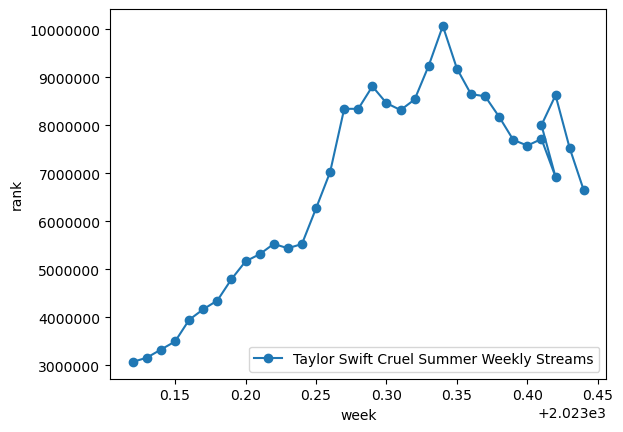

In [11]:
# Only filter by songs released in 2023

spotify_ts_ranked.plot(x='week',y='streams', marker='o', linestyle='-', label='Taylor Swift Cruel Summer Weekly Streams')
plt.xlabel('week')
plt.ylabel('rank')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.show

In [7]:
# Read in csv
csv_path = Path("TswiftTotals.csv")

tswift_totals = pd.read_csv(csv_path)
tswift_totals

tswift_totals_df = pd.DataFrame(tswift_totals)
tswift_totals_df


,Week,Total
0,2023.01,29673454
1,2023.02,27183090
2,2023.03,25084924
3,2023.04,23265078
4,2023.05,23144155
5,2023.06,22524665
6,2023.07,11141951
7,2023.08,10477848
8,2023.09,7941873
9,2023.10,7721567


<function matplotlib.pyplot.show(close=None, block=None)>

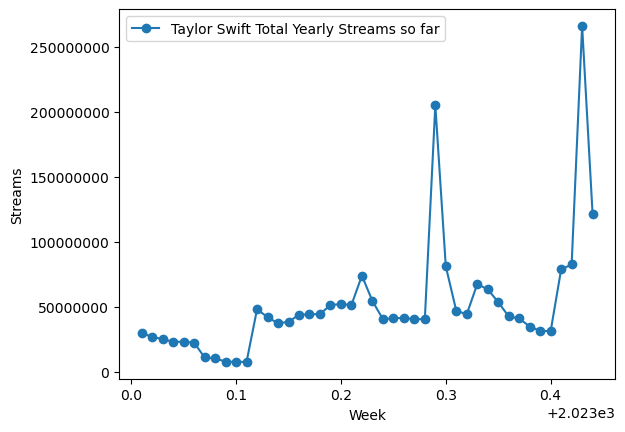

In [10]:
tswift_totals.plot(x='Week',y='Total', marker='o', linestyle='-', label='Taylor Swift Total Yearly Streams so far')
plt.xlabel('Week')
plt.ylabel('Streams')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.show